In [2]:
%cd '/content/drive/My Drive/ML/Final'

/content/drive/My Drive/ML/Final


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#**5. Train, đánh giá và lưu model sklearn**

##**5.1 Model Sklearn**

####**Import các thư viện cần thiết**

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix,accuracy_score,f1_score
import matplotlib.pyplot as plt

import joblib
import pickle
import h5py
import numpy as np
import os
import glob
import cv2

###**5.1.1 Vector normal**

In [ ]:
train_normal = 'H5PY/raw_train/train_normal.h5'
train_label = 'H5PY/raw_train/labels_train.h5'

In [ ]:
h5f_train = h5py.File(train_normal, 'r')
h5f_labels = h5py.File(train_label, 'r')

In [ ]:
data = h5f_train['dataset']
labels = h5f_labels['dataset']

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
h5f_train.close()
h5f_labels.close()

In [ ]:
data.shape

(12362, 3072)

In [ ]:
labels.shape

(12362,)

In [ ]:
# create models sklearn
models = []
models.append(LogisticRegression(random_state=42,max_iter=100000))
models.append(DecisionTreeClassifier(random_state=42))
models.append(KNeighborsClassifier())
models.append(GaussianNB())
models.append(SVC(random_state=42,max_iter=100000))

In [ ]:
results_accuracy = [[] for _ in range(len(models))]
results_f1 = [[] for _ in range(len(models))]
names = ['' for _ in range(len(models))]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in skf.split(data,labels):
    train_X, val_X = data[train_idx], data[val_idx]
    train_Y, val_Y = labels[train_idx], labels[val_idx]
    for i in range(len(models)):
        model = models[i]
        
        model.fit(train_X, train_Y)
        pred = model.predict(val_X)

        score_accuracy = accuracy_score(val_Y, pred)
        score_f1 = f1_score(val_Y,pred, average='micro')

        results_accuracy[i].append(score_accuracy)
        results_f1[i].append(score_f1)
        names[i] = model.__class__.__name__


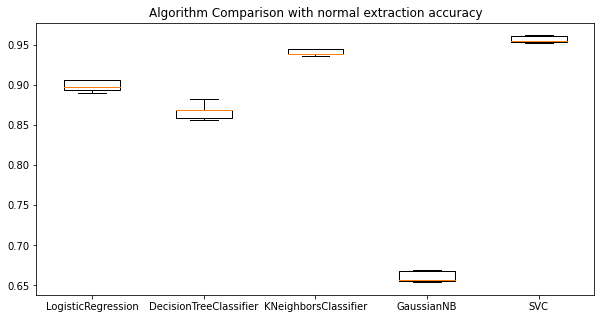

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(results_accuracy,labels=names)
plt.title('Algorithm Comparison with normal extraction accuracy')
plt.show()

In [ ]:
score_accuracy = np.array(results_accuracy)
for i in range(len(models)): 
    print('{}: {} ({})'.format(names[i],score_accuracy[i].mean(),score_accuracy[i].std()))

LogisticRegression: 0.8989653958545167 (0.006505969593983002)
DecisionTreeClassifier: 0.8672560416249541 (0.009420024990500143)
KNeighborsClassifier: 0.940867190904487 (0.0038399291450232445)
GaussianNB: 0.6605723365748137 (0.00660830613233447)
SVC: 0.9568846781486003 (0.004130308160145793)


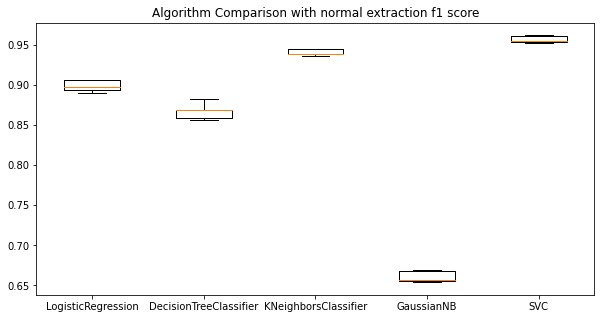

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(results_f1,labels=names)
plt.title('Algorithm Comparison with normal extraction f1 score')
plt.show()

In [ ]:
score_f1 = np.array(results_f1)
for i in range(len(models)): 
    print('{}: {} ({})'.format(names[i],score_f1[i].mean(),score_f1[i].std()))

LogisticRegression: 0.898965395854517 (0.006505969593982972)
DecisionTreeClassifier: 0.8672560416249541 (0.009420024990500117)
KNeighborsClassifier: 0.940867190904487 (0.0038399291450232445)
GaussianNB: 0.6605723365748137 (0.00660830613233447)
SVC: 0.9568846781486003 (0.004130308160145793)


In [ ]:
model_path = 'H5PY/model_raw_data/svm_normal.sav'

In [ ]:
joblib.dump(models[4], model_path)

['H5PY/model_raw_data/svm_normal.sav']

###**5.1.2 Vector local binary patterns**

In [ ]:
train_lbps = 'H5PY/raw_train/train_lbps.h5'
train_label = 'H5PY/raw_train/labels_train.h5'

In [ ]:
h5f_train = h5py.File(train_lbps, 'r')
h5f_labels = h5py.File(train_label, 'r')

In [ ]:
data = h5f_train['dataset']
labels = h5f_labels['dataset']

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
h5f_train.close()
h5f_labels.close()

In [ ]:
data.shape

(10876, 26)

In [ ]:
labels.shape

(12362,)

In [ ]:
# create models sklearn
models_lbps = []
models_lbps.append(LogisticRegression(random_state=42,max_iter=100000))
models_lbps.append(DecisionTreeClassifier(random_state=42))
models_lbps.append(KNeighborsClassifier())
models_lbps.append(GaussianNB())
models_lbps.append(SVC(random_state=42,max_iter=100000))

In [ ]:
results_accuracy = [[] for _ in range(len(models_lbps))]
results_f1 = [[] for _ in range(len(models_lbps))]
names = ['' for _ in range(len(models_lbps))]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in skf.split(data,labels):
    train_X, val_X = data[train_idx], data[val_idx]
    train_Y, val_Y = labels[train_idx], labels[val_idx]
    for i in range(len(models_lbps)):
        model = models_lbps[i]
        
        model.fit(train_X, train_Y)
        pred = model.predict(val_X)

        score_accuracy = accuracy_score(val_Y, pred)
        score_f1 = f1_score(val_Y,pred, average='micro')

        results_accuracy[i].append(score_accuracy)
        results_f1[i].append(score_f1)
        names[i] = model.__class__.__name__


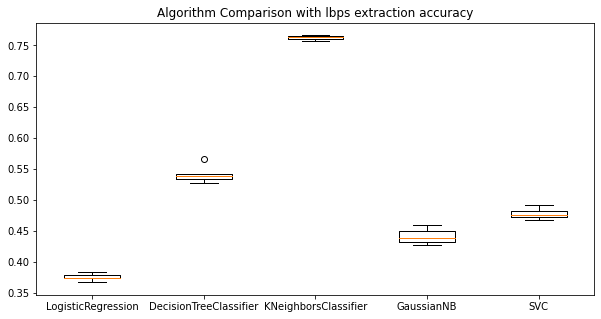

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(results_accuracy,labels=names)
plt.title('Algorithm Comparison with lbps extraction accuracy')
plt.show()

In [ ]:
score_accuracy = np.array(results_accuracy)
for i in range(len(models_lbps)): 
    print('{}: {} ({})'.format(names[i],score_accuracy[i].mean(),score_accuracy[i].std()))

LogisticRegression: 0.37461657094026496 (0.005519722288573674)
DecisionTreeClassifier: 0.5413376766816244 (0.013025187033052074)
KNeighborsClassifier: 0.762659898424015 (0.0032701815054538425)
GaussianNB: 0.44111121798269204 (0.011943950817080082)
SVC: 0.4777555201352602 (0.008744496886386005)


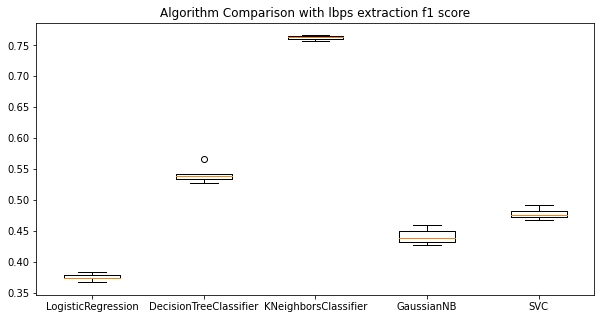

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(results_f1,labels=names)
plt.title('Algorithm Comparison with lbps extraction f1 score')
plt.show()

In [ ]:
score_f1 = np.array(results_f1)
for i in range(len(models_lbps)): 
    print('{}: {} ({})'.format(names[i],score_f1[i].mean(),score_f1[i].std()))

LogisticRegression: 0.37461657094026496 (0.0055197222885736775)
DecisionTreeClassifier: 0.5413376766816244 (0.013025187033052074)
KNeighborsClassifier: 0.762659898424015 (0.0032701815054538706)
GaussianNB: 0.44111121798269204 (0.011943950817080082)
SVC: 0.4777555201352602 (0.008744496886386005)


In [ ]:
model_path = 'H5PY/model_raw_data/knn_lbps.sav'

In [ ]:
joblib.dump(models_lbps[2], model_path)

['H5PY/model_raw_data/knn_lbps.sav']

###**5.1.2 Vector histogram**

In [4]:
train_hog = 'H5PY/raw_train/train_hog.h5'
train_label = 'H5PY/raw_train/labels_train.h5'

In [5]:
h5f_train = h5py.File(train_hog, 'r')
h5f_labels = h5py.File(train_label, 'r')

In [6]:
data = h5f_train['dataset']
labels = h5f_labels['dataset']

In [7]:
data = np.array(data)
labels = np.array(labels)

In [8]:
h5f_train.close()
h5f_labels.close()

In [9]:
data.shape

(12362, 144)

In [10]:
labels.shape

(12362,)

In [11]:
# create models sklearn
models_hog = []
models_hog.append(LogisticRegression(random_state=42,max_iter=100000))
models_hog.append(DecisionTreeClassifier(random_state=42))
models_hog.append(KNeighborsClassifier())
models_hog.append(GaussianNB())
models_hog.append(SVC(random_state=42,max_iter=100000))

In [12]:
results_accuracy = [[] for _ in range(len(models_hog))]
results_f1 = [[] for _ in range(len(models_hog))]
names = ['' for _ in range(len(models_hog))]

In [13]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in skf.split(data,labels):
    train_X, val_X = data[train_idx], data[val_idx]
    train_Y, val_Y = labels[train_idx], labels[val_idx]
    for i in range(len(models_hog)):
        model = models_hog[i]
        
        model.fit(train_X, train_Y)
        pred = model.predict(val_X)

        score_accuracy = accuracy_score(val_Y, pred)
        score_f1 = f1_score(val_Y,pred, average='micro')

        results_accuracy[i].append(score_accuracy)
        results_f1[i].append(score_f1)
        names[i] = model.__class__.__name__


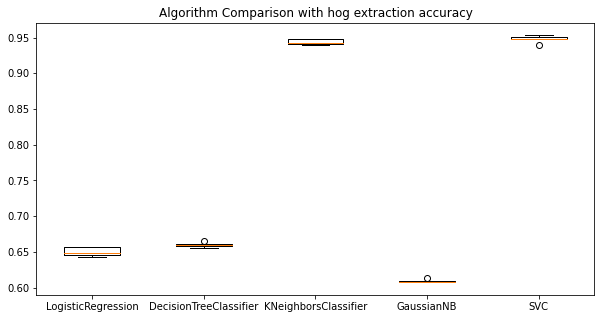

In [14]:
plt.figure(figsize=(10,5))
plt.boxplot(results_accuracy,labels=names)
plt.title('Algorithm Comparison with hog extraction accuracy')
plt.show()

In [15]:
score_accuracy = np.array(results_accuracy)
for i in range(len(models_hog)): 
    print('{}: {} ({})'.format(names[i],score_accuracy[i].mean(),score_accuracy[i].std()))

LogisticRegression: 0.6502989896055391 (0.005371528895480764)
DecisionTreeClassifier: 0.6600878484395223 (0.003158979950263869)
KNeighborsClassifier: 0.9438605875494173 (0.004026933313619018)
GaussianNB: 0.6089627197028882 (0.0022886146676266163)
SVC: 0.9478239419386331 (0.004453906488427343)


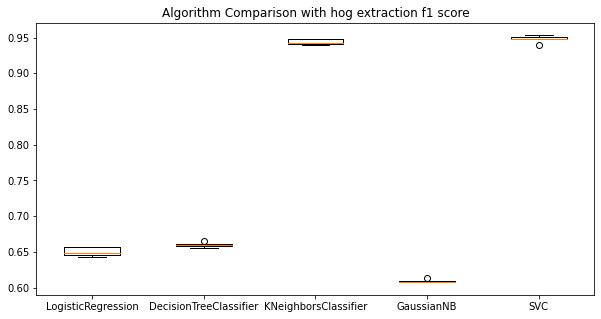

In [16]:
plt.figure(figsize=(10,5))
plt.boxplot(results_f1,labels=names)
plt.title('Algorithm Comparison with hog extraction f1 score')
plt.show()

In [17]:
score_f1 = np.array(results_f1)
for i in range(len(models_hog)): 
    print('{}: {} ({})'.format(names[i],score_f1[i].mean(),score_f1[i].std()))

LogisticRegression: 0.6502989896055391 (0.005371528895480764)
DecisionTreeClassifier: 0.6600878484395223 (0.003158979950263869)
KNeighborsClassifier: 0.9438605875494173 (0.004026933313619018)
GaussianNB: 0.6089627197028882 (0.0022886146676266163)
SVC: 0.9478239419386331 (0.004453906488427343)


In [19]:
model_path = 'H5PY/model_raw_data/svm_hog.sav'

In [20]:
joblib.dump(models_hog[4], model_path)

['H5PY/model_raw_data/svm_hog.sav']